<a href="https://colab.research.google.com/github/bartzabel05/Sentiment_Analysis/blob/main/Sentiment_Score_of_Tweets_using_VADER_and_TextBlob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords,wordnet
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import time
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
from google.colab import files
file=files.upload()

Saving mental_health.csv to mental_health.csv


In [3]:
#importing the mental health corpus
df=pd.read_csv("/content/mental_health.csv")

#0=>tweet is okay
#1=>poisonous content[bad mental health]
df.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27977 non-null  object
 1   label   27977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.3+ KB


In [5]:
df['label'].value_counts()

0    14139
1    13838
Name: label, dtype: int64

In [6]:
df.isna().any()

text     False
label    False
dtype: bool

In [7]:
df.isna().sum()

text     0
label    0
dtype: int64

In [8]:
df['text'].unique()

array(['dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like  right guys learn math',
       'nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself',
       'music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhymesayers willing explore new genresartists such anything generic rap the type exclusively sex drugs cool rapper is rap types pretty good pop popular couple years ago dunno technical genre name anyways anyone got music recommendations favorite artistssongs',
       ...,
       'cant get dog think ill kill myselfthe last thing im holding for yup first two applications didnt work already received many one looking for sent third one different place dont hopes high up',
       'whats point princess bridei really think like

In [9]:
df['text'].nunique

<bound method IndexOpsMixin.nunique of 0        dear american teens question dutch person hear...
1        nothing look forward lifei dont many reasons k...
2        music recommendations im looking expand playli...
3        im done trying feel betterthe reason im still ...
4        worried  year old girl subject domestic physic...
                               ...                        
27972    posting everyday people stop caring  religion ...
27973    okay definetly need hear guys opinion ive pret...
27974    cant get dog think ill kill myselfthe last thi...
27975    whats point princess bridei really think like ...
27976    got nudes person might might know snapchat do ...
Name: text, Length: 27977, dtype: object>

In [10]:
df.shape

(27977, 2)

In [11]:
df['text'].drop_duplicates(inplace=True)

In [12]:
class_counts=df['label'].value_counts()

In [13]:
class_counts

0    14139
1    13838
Name: label, dtype: int64

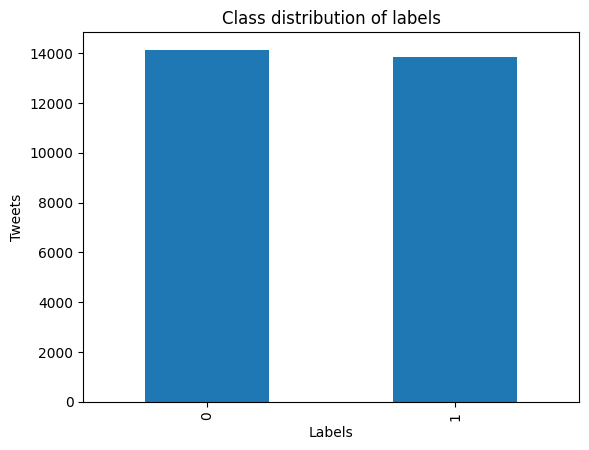

In [14]:
class_counts.plot(kind='bar')
plt.title("Class distribution of labels")
plt.xlabel("Labels")
plt.ylabel("Tweets")
plt.show()

In [15]:
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

In [16]:
df

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
...,...,...
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1


In [17]:
from nltk.corpus import stopwords,wordnet
stop_words=list(stopwords.words("english"))
new_stop_words=["using","show","result","large","also","I 'm'","iv","ive","one","two","new","previously","shown","Im","I'm","im","I' m","didnt","dont","didn't","don't","done","did","wasnt","wasn't","was","ill"]
for w in new_stop_words:
    stop_words.append(w)

In [18]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import nltk
from nltk.tokenize import RegexpTokenizer

In [ ]:
nltk.download('punkt')
corpus=[]
for i in range(27977):
#remove urls,mentions and hashtags from text
#substitute urls,mentions and hashtags with blank space
    text=re.sub(r'http\S+','',df['text'][i])
    text=re.sub(r'@\S+','',text)
    text=re.sub(r'#\S+','',text)
    text=re.sub(r'\W+',' ',text)
    text=re.sub(r'\\d|\\W+',' ',text)
    text=text.lower()
#     cleaning non english words
    text=text.replace("[^a-zA-Z]"," ")
    word_tokens=nltk.word_tokenize(text)
    filtered_word=[w for w in word_tokens if all(ord(c)<128 for c in w)]
    filtered_word=[w+" " for w in filtered_word]
    text="".join(filtered_word)
    # removing stop words
    word_tokens=nltk.word_tokenize(text)
    filtered_word=[w for w in word_tokens if not w in stop_words]
    filtered_word=[w+" " for w in filtered_word]
    text="".join(filtered_word)
#     text=re.sub(r'[^a-zA-Z]',' ',text)
#     text=re.sub("&lt;/?.*&gt","&lt;&gt; ",text)
#     words=text.split()
#     ps=PorterStemmer()
#     lem=WordNetLemmatizer()
#     text=[lem.lemmatize(word) for word in text if not word in stop_words]
#     text="".join(text)
    corpus.append(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
corpus

In [ ]:
#removing stop words if any from the sentence
df['clean_text']=corpus
all_text=''.join(df['clean_text'].values)
words=all_text.split()

In [ ]:
df

In [ ]:
word_counts=Counter(words)
top_words=word_counts.most_common(10)

In [ ]:
top_words

In [ ]:
#get frequency for each word
fd=nltk.FreqDist(words)
fd.tabulate(3)

In [ ]:
#most commonly used words
# top_words=word_counts.most_common(10)
x_values=[word[0] for word in top_words]
y_values=[word[1] for word in top_words]
plt.bar(x_values,y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title("Most commonly used words")
plt.show()

In [ ]:
df.head()

In [ ]:
from wordcloud import WordCloud

In [ ]:
text=' '.join([word for word in df['clean_text']])
plt.figure(figsize=(20,16),facecolor="None")
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("Most frequent words")
plt.show()

In [ ]:
words

In [ ]:
train=df[:100]

In [ ]:
train

In [ ]:
from textblob import TextBlob

In [ ]:
#Textblob sentiment analysis

def sentiment_analysis(df1):
    def getSubjectivity(text):
        return TextBlob(text).sentiment.subjectivity

    def getPolarity(text):
        return TextBlob(text).sentiment.polarity

    df1['TextBlob_Subjectivity']=df1['clean_text'].apply(getSubjectivity)
    df1['TextBlob_Polarity']=df1['clean_text'].apply(getPolarity)

    def getAnalysisScore(score):
        if score<0:
              return 1
        elif score==0 or score>0:
              return 0
    #get sentiment based on polarity score
    def getSentiment(score):
        if score<0:
            return 'Negative'
        elif score==0:
            return "Neutral"
        else:
            return "Positive"

    df1['TextBlob_Label']=df1['TextBlob_Polarity'].apply(getAnalysisScore)
    df1['TextBlob_Sentiment']=df1['TextBlob_Polarity'].apply(getSentiment)
    return df1

In [ ]:
res=sentiment_analysis(train)

In [ ]:
res

In [ ]:
def getAccuracyScore(df):
    correct=0
    textBlobpred=df['TextBlob_Label']
    label=df['label']
    for i in range(100):
        if(textBlobpred[i]==label[i]):
            correct=correct+1

    return correct/100

In [ ]:
print(getAccuracyScore(res))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(res['TextBlob_Label'],res['label'])

In [ ]:


fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,16))
res['TextBlob_Polarity'].plot(kind='hist',ax=axes[0],title="Polarity")
res['TextBlob_Subjectivity'].plot(kind='hist',ax=axes[1],title="Subjectivity")
plt.show()

In [ ]:
res

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
nltk.download('vader_lexicon')
def sentiment_analysis_VADER(df1):
    sentiment_scores=[]
    def getPolarity(text):
        sia=SentimentIntensityAnalyzer()
        return sia.polarity_scores(text)

    df1['VADER_Polarity']=df1['clean_text'].apply(getPolarity)

    def getAnalysisScore(score):
        if score["compound"]>=0.05:
            return 0
        elif score["compound"]<=-0.05:
            return 1
        if score["compound"]>-0.05 and score["compound"]<0.05:
            return 1

    def getSentiment(score):
        if score["compound"]>=0.05:
            return "Positive"
        elif score["compound"]<=-0.05:
            return "Negative"
        if score["compound"]>-0.05 and score["compound"]<0.05:
            return "Neutral"

    df1['VADER_Label']=df1['VADER_Polarity'].apply(getAnalysisScore)
    df1['VADER_Sentiment']=df1['VADER_Polarity'].apply(getSentiment)
    return df1

In [ ]:
train1=df[:100]

In [ ]:
train1

In [ ]:
res1=sentiment_analysis_VADER(train1)

In [ ]:
res1.head()

In [ ]:
train1

In [ ]:
def getAccuracyScoreVADER(df):
    correct=0
    VADERpred=df['VADER_Label']
    label=df['label']
    for i in range(100):
        if(VADERpred[i]==label[i]):
            correct=correct+1

    return correct/100

In [ ]:
print(getAccuracyScoreVADER(res1))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(res1['label'],res1['VADER_Label'])

In [ ]:
#using VADER
sentiment_scores=[]
for text in df['text']:
    sia=SentimentIntensityAnalyzer()
    sentiment_scores.append((sia.polarity_scores(text)))

print(sentiment_scores)
sentiment_VADER_df=pd.DataFrame(sentiment_scores,columns=['neg','neu','pos','compound'])

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(20,16))
sentiment_VADER_df["neg"].plot(kind='hist',ax=axes[0,0],title="Negative")
sentiment_VADER_df['neu'].plot(kind='hist',ax=axes[0,1],title="Neutral")
sentiment_VADER_df['pos'].plot(kind='hist',ax=axes[1,0],title="Positive")
sentiment_VADER_df['compound'].plot(kind='hist',ax=axes[1,1],title="Compound")
plt.show()

In [ ]:
sentiment_VADER_df

In [ ]:
df

In [ ]:
# df=df.drop(["VADER_Polarity"],axis=1)
train3=df[:100]
# train3=train3.drop(["VADER_Polarity"],axis=1)

In [ ]:
train3

# Using Transformers [default sentiment analysis pretrained model]

In [ ]:
!pip install transformers
!pip install tensorflow

In [ ]:
from transformers import pipeline
#using transformers default sentiment analysis model [not BERT]
SentimentClassifier=pipeline('sentiment-analysis')

In [ ]:
r=SentimentClassifier("I love my mother.I am going to kill her.")
print(r[0]['label'])

In [ ]:
def BERTSentiment(text):
  return(SentimentClassifier(text)[0]['label'])

In [ ]:
train3["BERTSentiment"]=train3["clean_text"].apply(BERTSentiment)
# print(train3)

In [ ]:
train3

In [ ]:
train3[train3["BERTSentiment"]=="NEUTRAL"]

In [ ]:
def getLabels(sentiment):
  if sentiment=="POSITIVE":
    return 0
  if sentiment=="NEGATIVE":
    return 1

train3['BERTLabel']=train3["BERTSentiment"].apply(getLabels)

In [ ]:
train3

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(train3['BERTLabel'],train3['label']))

# Using dataset created from chatgpt

In [ ]:
#comments dataset
from google.colab import files
file=files.upload()

In [ ]:
import pandas as pd
data=pd.read_csv("/content/comments.csv")

In [ ]:
data

In [ ]:
ddf=data[["Text","Sentiment"]]

In [ ]:
def setLabels(Sentiment):
    if Sentiment=="Positive":
        return 0
    if Sentiment=="Negative":
        return 1
ddf['label']=ddf["Sentiment"].apply(setLabels)

In [ ]:
ddf

In [ ]:
ddf.rename(columns={'Text':'text'},inplace=True)
corpus=[]
for i in range(20):

    text=re.sub(r'\\d|\\W+',' ',ddf['text'][i])
    text=text.lower()
    word_tokens=nltk.word_tokenize(text)
    filter_words=[w for w in word_tokens if w not in stop_words]
    filter_words=[w+" " for w in filter_words]
    text="".join(filter_words)
    corpus.append(text)

In [ ]:
corpus

In [ ]:
ddf['clean_text']=corpus

In [ ]:
ddf

In [ ]:
test=ddf

In [ ]:
res3=sentiment_analysis_VADER(test)

In [ ]:
res3

In [ ]:
accuracy_score(res3['label'],res3['VADER_Label'])

In [ ]:
ddf

In [ ]:
res4=sentiment_analysis(test)

In [ ]:
res4

In [ ]:
print(accuracy_score(res4['TextBlob_Label'],res4['label']))

In [ ]:
#using hugging face transformers pipeline with pretrained default sentiment analysis transformer [not BERT]
ddf["BERTSentiment"]=ddf["clean_text"].apply(BERTSentiment)

In [ ]:
ddf

In [ ]:
ddf['BERTLabel']=ddf["BERTSentiment"].apply(getLabels)

In [ ]:
ddf

In [ ]:
print(accuracy_score(ddf['BERTLabel'],ddf['label']))

In [ ]:
resBERT=ddf[["text","label","clean_text","BERTSentiment","BERTLabel"]]

In [ ]:
resBERT

In [ ]:
#using hugging face transformers and flair
#hugging face BERTweet Model

# !pip install torch
# !pip install transformers

# import torch
# from transformers import AutoModel,AutoTokenizer

# bertweet=AutoModel.from_pretrained('vinai/bertweet-base')
# tokenizer=AutoTokenizer.from_pretrained('vinai/bertweet-base',use_fast=False)

# line="I love my Mother.I am going to kill her."

# input_ids=torch.tensor([tokenizer.encode(line)])

# with torch.no_grad():
#   features=bertweet(input_ids)
#   print(features)

# Fine Tuning Transformers on datasets

